In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [99]:
df = pd.read_csv("data/info_fornecedores.csv")

In [100]:
df.head()

,maquina,dimensao_peca,tempo_producao
0,A,11.778736,7.956973
1,A,2.469800,6.673119
2,A,5.755306,7.360727
3,A,2.617352,8.171357
4,A,6.619305,8.785291


In [101]:
df[df["maquina"] == "A"]

,maquina,dimensao_peca,tempo_producao
0,A,11.778736,7.956973
1,A,2.469800,6.673119
2,A,5.755306,7.360727
3,A,2.617352,8.171357
4,A,6.619305,8.785291
...,...,...,...
995,A,5.973622,8.713880
996,A,7.314843,7.051371
997,A,4.253307,7.395687
998,A,5.949874,7.237203


In [102]:
df.columns

Index(['maquina', 'dimensao_peca', 'tempo_producao'], dtype='object')

#### Primeiro analisando alguns dados como média, desvio padrão

In [103]:
def dados_estatisticos_dos_fornecedores(df):
    df_groupby = df.groupby('maquina').agg({
        'dimensao_peca': ['mean','median','std',
                          ('range', lambda x: x.max() - x.min()),
                          ("q1", lambda x: x.quantile(0.25)), 
                          ("q3", lambda x: x.quantile(0.75))],
        'tempo_producao': ['mean', 'median', 'std',
                          ('range', lambda x: x.max() - x.min()),
                          ("q1", lambda x: x.quantile(0.25)), 
                          ("q3", lambda x: x.quantile(0.75))],
        })
    return df_groupby

In [104]:
df_groupby = dados_estatisticos_dos_fornecedores(df)
df_groupby

dimensao_peca                                                     \
                 mean    median       std      range        q1        q3   
maquina                                                                    
A            5.132470  4.908747  2.187316  12.165711  3.658492  6.336809   
B            5.083135  4.963891  2.102606  12.916458  3.646417  6.363687   
C            5.021647  4.889836  2.141102  12.402916  3.542848  6.251959   
D            5.051479  4.901320  2.079047  13.160998  3.635533  6.154061   
E            4.974161  4.688545  2.168522  13.869463  3.538643  6.097307   

        tempo_producao                                                      
                  mean    median       std      range        q1         q3  
maquina                                                                     
A             7.860997  7.572711  2.117606  15.031629  6.544557   8.711839  
B             8.062903  7.905804  1.986926  15.399012  6.829922   9.013572  
C             8.257887  8.110213  2.170245  17.415001  6.877829   9.333677  
D             8.354044  8.243873  2.086372  14.507222  7.016239   9.584649  
E             8.808921  8.649188  2.309851  17.895261  7.375287  10.077598

## Boxplot

#### Interpretação:

- Uma largura de caixa (IQR) mais estreita indicando menos variabilidade.

- Uma linha de mediana mais próxima de 4.8 indicando que suas dimensões típicas de peças estão mais próximas do valor alvo.

- Menos outliers além da faixa de 4.8 +/- 1.8 indicando um desempenho mais consistente.

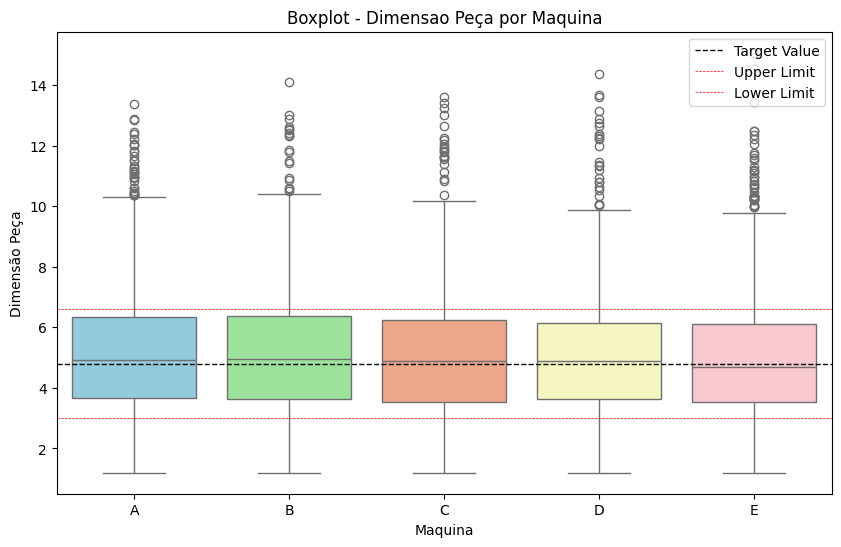

In [105]:
colors = ['#87CEEB', '#90EE90', '#FFA07A', '#FFFFB9', '#FFC0CB']

plt.figure(figsize=(10, 6))
sns.boxplot(x='maquina', y='dimensao_peca', data=df, palette=colors, hue='maquina', dodge=False, linewidth=1)

# Plot horizontal line at 4.8
plt.axhline(y=4.8, color='k', linestyle='--', label='Target Value', linewidth=1)
plt.axhline(y=(4.8 + 1.8), color='r', linestyle='--', label='Upper Limit', linewidth=0.5)
plt.axhline(y=(4.8 - 1.8), color='r', linestyle='--', label='Lower Limit', linewidth=0.5)

plt.title('Boxplot - Dimensao Peça por Maquina')
plt.xlabel('Maquina')
plt.ylabel('Dimensão Peça')
plt.legend(loc='upper right')
plt.show()

D e E

## Histograma

#### Interpretação:


- Uma distribuição simétrica e centrada em torno do valor alvo de 4.8 indica consistência na produção.

- Fornecedores com mais peças dentro da faixa de 4.8 +/- 1.8 demonstram consistência e precisão na produção.

- Um número elevado de outliers (peças com dimensões muito acima ou abaixo da faixa alvo) pode indicar maior variabilidade na produção.

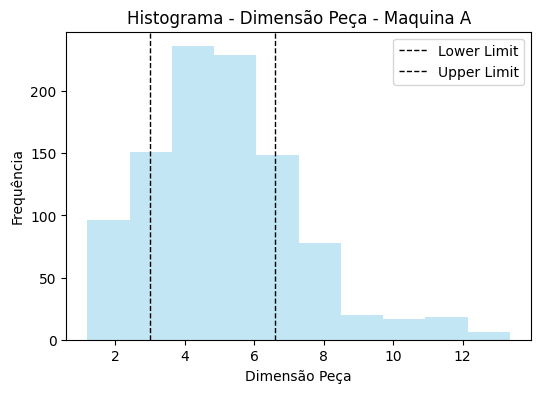

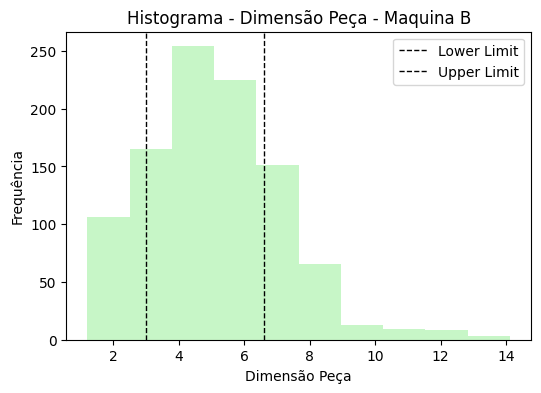

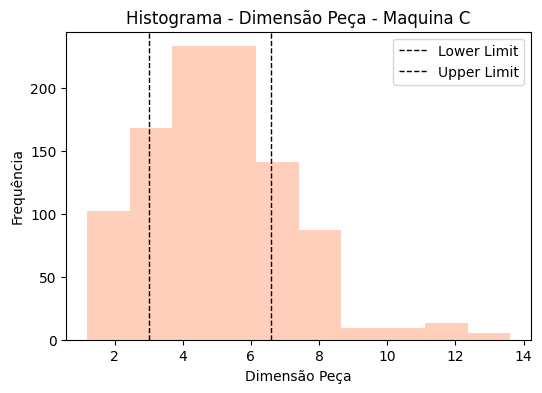

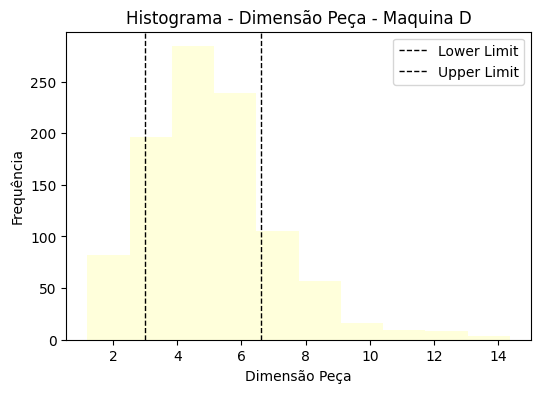

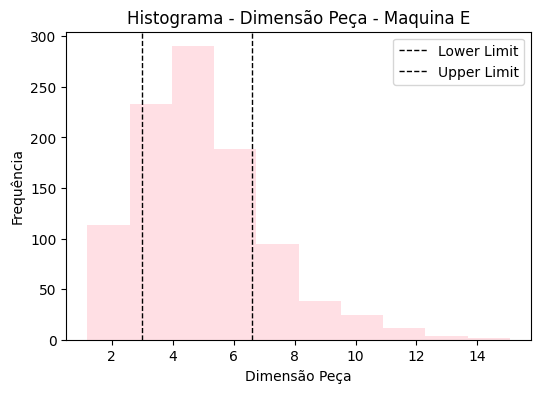

In [125]:
colors = ['#87CEEB', '#90EE90', '#FFA07A', '#FFFFB9', '#FFC0CB']

for i, maquina in enumerate(df['maquina'].unique()):
    supplier_data_dimensao = df[df['maquina'] == maquina]['dimensao_peca']
    plt.figure(figsize=(6, 4))
    
    # Plot histogram with assigned color for each supplier
    plt.hist(supplier_data_dimensao, bins=10, alpha=0.5, color=colors[i])
    
    # Plotting vertical lines for the range around the mean
    plt.axvline(x=4.8 - 1.8, color='k', linestyle='--', label='Lower Limit', linewidth=1)
    plt.axvline(x=4.8 + 1.8, color='k', linestyle='--', label='Upper Limit', linewidth=1)
    
    plt.title(f'Histograma - Dimensão Peça - Maquina {maquina}')
    plt.xlabel('Dimensão Peça')
    plt.ylabel('Frequência')
    plt.legend()
    plt.show()

B e D

In [143]:
def percentage_out_of_dimension(df):
    maquina = df['maquina'].unique().tolist()

    for i in maquina:
        subset = df[df["maquina"] == i]
        if not subset.empty:
             erros = subset[(subset["dimensao_peca"] > (4.8 + 1.8)) | (subset["dimensao_peca"] < (4.8 - 1.8))]
             percentage = (len(erros)/len(subset)) *100
             print(f"Porcentagem de erro para maquina {i} é:{percentage}")
    return

In [144]:
percentage_out_of_dimension(df)

Porcentagem de erro para maquina A é:36.3
Porcentagem de erro para maquina B é:36.7
Porcentagem de erro para maquina C é:37.3
Porcentagem de erro para maquina D é:33.7
Porcentagem de erro para maquina E é:34.8
